# 2013~2020년 분양가 데이터 분석

## 2013~2020 분양가격 분석

In [1]:
# data파일에 무슨 파일이 있는지 확인
%ls data

In [2]:
#환경 구성
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
import seaborn as sns
import pandas as pd

In [3]:
#데이터 불러오기
#2013.9~2015.8월까지의 분양가격데이터와 2015.10~2020.4월까지의 분양가격데이터
df_last = pd.read_csv("data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv", encoding="cp949")
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")

In [4]:
#불러온 데이터 확인
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
#불러온 데이터 확인
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [6]:
#불러온 데이터의 정보확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4675 non-null   object
 1   규모구분     4675 non-null   object
 2   연도       4675 non-null   int64 
 3   월        4675 non-null   int64 
 4   분양가격(㎡)  4346 non-null   object
dtypes: int64(2), object(3)
memory usage: 182.7+ KB


In [7]:
#분양가격이 object로 되어있으니 숫자값으로 바꿔야한다
df_last["분양가격(㎡)"]

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4670    4085
4671    4039
4672    4091
4673     NaN
4674     NaN
Name: 분양가격(㎡), Length: 4675, dtype: object

In [8]:
#errors = 'coerce' 는 공백에서 계속 에러가 뜨니 무시하도록 한다
pd.to_numeric(df_last["분양가격(㎡)"], errors = 'coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4670    4085.0
4671    4039.0
4672    4091.0
4673       NaN
4674       NaN
Name: 분양가격(㎡), Length: 4675, dtype: float64

In [9]:
# 숫자값으로 바꾼 분양가격(㎡)을 분양가격이라는 열에 넣어준다
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors = 'coerce')

In [10]:
# 2013~2015는 3.3제곱미터당 평당분양가격을 기준으로 되어 있고 2015~2020는 제곱미터당 평균분양가격으로 되어 있다.
# 따라서 같은 단위로 바꿔줘야하기 때문에 3.3을 곱해준다
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [11]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4670,제주,전체,2020,4,4085,4085.0,13480.5
4671,제주,전용면적 60㎡이하,2020,4,4039,4039.0,13328.7
4672,제주,전용면적 60㎡초과 85㎡이하,2020,4,4091,4091.0,13500.3
4673,제주,전용면적 85㎡초과 102㎡이하,2020,4,NaN,NaN,NaN


In [12]:
#규모구분에 전용면적이라는 단어와 이하, 초과를 빼고 새로운 열로 만들어준다
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4670          전체
4671         60㎡
4672     60㎡~85㎡
4673    85㎡~102㎡
4674       102㎡~
Name: 전용면적, Length: 4675, dtype: object

In [13]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...,...
4670,제주,전체,2020,4,4085,4085.0,13480.5,전체
4671,제주,전용면적 60㎡이하,2020,4,4039,4039.0,13328.7,60㎡
4672,제주,전용면적 60㎡초과 85㎡이하,2020,4,4091,4091.0,13500.3,60㎡~85㎡
4673,제주,전용면적 85㎡초과 102㎡이하,2020,4,NaN,NaN,NaN,85㎡~102㎡


In [14]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [15]:
#last와 맞춰주기 위해 열을 지역, 기간, 평당분양가격으로 바꿔준다.
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [16]:
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [17]:
#first에는 기간이 나와있고 last에는 연도,월이 나와있으므로 기간을 나눠서 연도,월로 바꿔준다
date= "2013년12월"
def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year
y = parse_year(date)
def parse_month(date):
    month = date.split("년")[-1].replace("월","")
    month = int(month)
    return month
x = parse_month(date)
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [18]:
#last에는 전용면적이 나눠져있으므로 전체에 해당하는 값만 산출한다
df_last[df_last["전용면적"] == "전체"]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
5,인천,전체,2015,10,3163,3163.0,10437.9,전체
10,경기,전체,2015,10,3138,3138.0,10355.4,전체
15,부산,전체,2015,10,3112,3112.0,10269.6,전체
20,대구,전체,2015,10,2682,2682.0,8850.6,전체
...,...,...,...,...,...,...,...,...
4650,전북,전체,2020,4,2503,2503.0,8259.9,전체
4655,전남,전체,2020,4,2591,2591.0,8550.3,전체
4660,경북,전체,2020,4,2669,2669.0,8807.7,전체
4665,경남,전체,2020,4,3153,3153.0,10404.9,전체


In [19]:
#last에는 열에 지역명, 연도, 월, 분양가격, 평당분양가격, 전용면적이 있고
#first에는 지역명, 기간, 평당분양가격, 연도, 월이 있으므로 같은것에 해당하는 것끼리 나타낸다
cols = ['지역명', '연도', '월', '평당분양가격']
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4650,전북,2020,4,8259.9
4655,전남,2020,4,8550.3
4660,경북,2020,4,8807.7
4665,경남,2020,4,10404.9


In [20]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [21]:
#두개의 데이터를 합친다
df_plus = pd.concat([df_first_prepare, df_last_prepare])
df_plus

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4650,전북,2020,4,8259.9
4655,전남,2020,4,8550.3
4660,경북,2020,4,8807.7
4665,경남,2020,4,10404.9


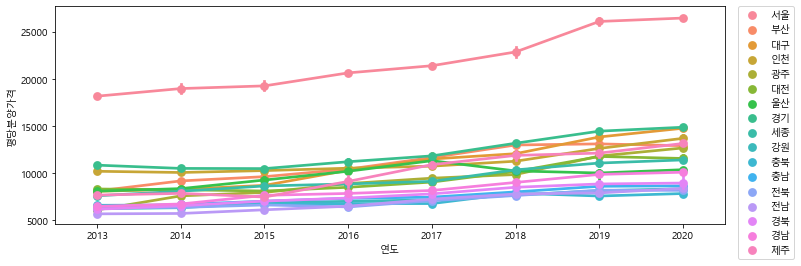

In [22]:
#연도에 따른 평당분양가격을 지역별로 나워서 나타낸 선 그래프이다.
plt.figure(figsize=(12,4))
sns.pointplot(data=df_plus, x="연도", y="평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

(76, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

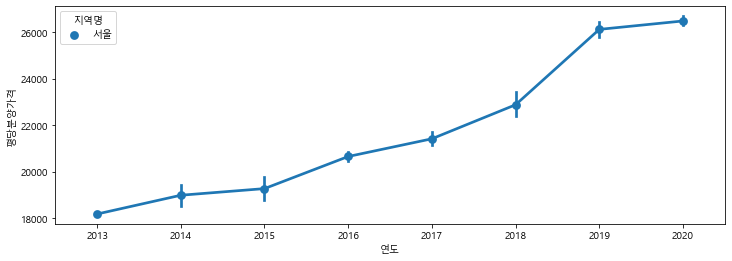

In [23]:
#서울이 유독 높이 있어서 서울을 따로 비교한다.
df_seoul = df_plus[df_plus["지역명"] == "서울"]
print(df_seoul.shape)
plt.figure(figsize=(12,4))
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격", hue = "지역명")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

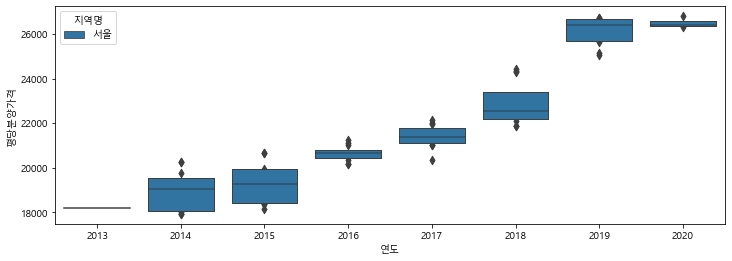

In [24]:
#boxenplot로 최대값과 최솟값 등등을 같이 보여준다
plt.figure(figsize=(12,4))
sns.boxenplot(data=df_seoul, x="연도", y="평당분양가격", hue = "지역명")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

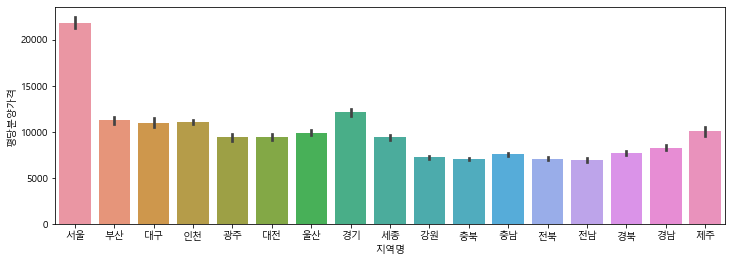

In [25]:
#지역별로 나타낸 그래프들을 보여준다
plt.figure(figsize=(12,4))
sns.barplot(data=df_plus, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

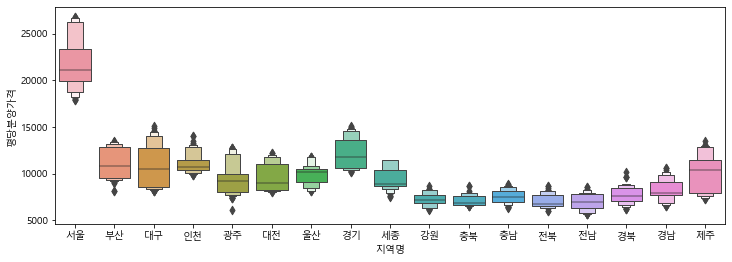

In [26]:
##최솟값, 1사분위수, 2사분위수, 3사분위수, 최대값을 보여준다
plt.figure(figsize=(12,4))
sns.boxenplot(data=df_plus, x="지역명", y="평당분양가격")

# 분양가 상승 원인 
    
    *분양가 상승 원인 예상
        *전세가 상승
        *집 공급부족(미분양 물량 감소)

## 2013~2020 전세가격 데이터 분석

In [27]:
#data파일에 무슨 파일이 있는지 확인
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AB7-47B5

 C:\Users\dirhq\아파트 시세 데이터 분석\data 디렉터리

2020-11-29  오후 01:41    <DIR>          .
2020-11-29  오후 01:41    <DIR>          ..
2020-11-29  오후 01:41             7,952 미분양주택현황(2020년9월말)_통계누리★(완).csv
2020-11-27  오후 03:02             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-11-28  오후 08:37           178,221 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv
2020-11-27  오후 03:03           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
2020-11-28  오후 09:50             4,635 한국감정원_아파트 전세가격지수(월별)_20201014 (1).csv
               5개 파일             355,481 바이트
               2개 디렉터리  30,983,876,608 바이트 남음


In [28]:
#데이터 불러오기
#2013~2020.10까지 아파트 전세가격지수를 불러온다
df_charter = pd.read_csv("data/한국감정원_아파트 전세가격지수(월별)_20201014 (1).csv", encoding="cp949")

In [29]:
df_charter

,지역,13-Sep,13-Oct,13-Nov,13-Dec,14-Jan,14-Feb,14-Mar,14-Apr,14-May,...,19-Dec,20-Jan,20-Feb,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep
0,전국,84.679741,85.512038,86.145525,86.680615,87.437849,88.066215,88.687525,88.897190,88.987622,...,95.341298,95.766428,96.091694,96.388972,96.567422,96.708500,97.109709,97.606468,98.272453,99.069507
1,수도권,78.594636,79.715682,80.521531,81.159647,82.127283,82.983916,83.861421,84.046355,84.090069,...,96.478042,97.059651,97.527320,97.936168,98.209382,98.425020,98.949467,99.570200,100.379115,101.334435
2,지방권,91.095290,91.586726,92.017473,92.430987,92.943599,93.309716,93.639397,93.875709,94.018096,...,94.281326,94.562725,94.757565,94.952888,95.044923,95.118116,95.407266,95.791501,96.328002,96.981986
3,서울,78.970406,80.213278,81.016477,81.594354,82.575519,83.308442,83.943062,84.072500,84.059577,...,99.490290,100.202661,100.447390,100.611229,100.721460,100.784430,101.022640,101.473256,102.132697,102.744937


In [30]:
#NaN값을 제거하여 오류값을 제거한다.
df_charter = df_charter.dropna(axis=1)

df_charter

,지역,13-Sep,13-Oct,13-Nov,13-Dec,14-Jan,14-Feb,14-Mar,14-Apr,14-May,...,19-Dec,20-Jan,20-Feb,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep
0,전국,84.679741,85.512038,86.145525,86.680615,87.437849,88.066215,88.687525,88.897190,88.987622,...,95.341298,95.766428,96.091694,96.388972,96.567422,96.708500,97.109709,97.606468,98.272453,99.069507
1,수도권,78.594636,79.715682,80.521531,81.159647,82.127283,82.983916,83.861421,84.046355,84.090069,...,96.478042,97.059651,97.527320,97.936168,98.209382,98.425020,98.949467,99.570200,100.379115,101.334435
2,지방권,91.095290,91.586726,92.017473,92.430987,92.943599,93.309716,93.639397,93.875709,94.018096,...,94.281326,94.562725,94.757565,94.952888,95.044923,95.118116,95.407266,95.791501,96.328002,96.981986
3,서울,78.970406,80.213278,81.016477,81.594354,82.575519,83.308442,83.943062,84.072500,84.059577,...,99.490290,100.202661,100.447390,100.611229,100.721460,100.784430,101.022640,101.473256,102.132697,102.744937


In [31]:
# 분양가 데이터와 비교하기 위해 지역, 기간, 지역별전세가격으로 열을 고정한다.
df_charter_melt = df_charter.melt(id_vars="지역", var_name="기간", value_name="지역별전세가격")
df_charter_melt.head()

,지역,기간,지역별전세가격
0,전국,13-Sep,84.679741
1,수도권,13-Sep,78.594636
2,지방권,13-Sep,91.095290
3,서울,13-Sep,78.970406
4,전국,13-Oct,85.512038


In [32]:
#기간을 연도와 월로 나눠주기위해 함수를 지정한다.
date="13-Sep"
date.split("-")[1]

'Sep'

In [33]:
#연도 구하기
df_charter_melt["연도"] = df_charter_melt["기간"].str.replace(" ","").str.strip()

def charter_year(date):
    year = date.split("-")[0]
    year = int(year)
    return year
z = charter_year(date)
z

13

In [34]:
#월 구하기
def charter_month(date):
    month = date.split("-")[-1]
    month = str(month)
    return month
k = charter_month(date)
k

'Sep'

In [35]:
#구한 연도와 월을 적용시켜준다
df_charter_melt["연도"] = df_charter_melt["기간"].apply(charter_year)
df_charter_melt["월"] = df_charter_melt["기간"].apply(charter_month)
df_charter_melt.head()

,지역,기간,지역별전세가격,연도,월
0,전국,13-Sep,84.679741,13,Sep
1,수도권,13-Sep,78.594636,13,Sep
2,지방권,13-Sep,91.095290,13,Sep
3,서울,13-Sep,78.970406,13,Sep
4,전국,13-Oct,85.512038,13,Oct


In [36]:
#쓸모없는 기간을 없애고 지역, 연도, 월, 지역별전세가격순으로 둔다
cols = ['지역', '연도', '월', '지역별전세가격']

In [37]:
df_charter_prepare = df_charter_melt[cols].copy()
df_charter_prepare

,지역,연도,월,지역별전세가격
0,전국,13,Sep,84.679741
1,수도권,13,Sep,78.594636
2,지방권,13,Sep,91.095290
3,서울,13,Sep,78.970406
4,전국,13,Oct,85.512038
...,...,...,...,...
335,서울,20,Aug,102.132697
336,전국,20,Sep,99.069507
337,수도권,20,Sep,101.334435
338,지방권,20,Sep,96.981986


## 2015~2020 미분양주택 데이터 분석

In [38]:
#2015~2020.9까지의 미분양주택현황을 가져온다
df_unsold = pd.read_csv("data/미분양주택현황(2020년9월말)_통계누리★(완).csv", encoding="utf-8")

In [39]:
df_unsold

,구분,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,...,19.12,20.1,20.2,20.3,20.4,20.5,20.6,20.7,20.8,20.9
0,서울,"1,497","1,238","1,064",987,976,638,482,317,251,...,151,131,112,91,78,70,61,58,56,54
1,부산,"1,710","1,515","1,258",935,835,987,"1,371","1,044","1,252",...,"2,115","2,266","2,061","1,979","1,993","2,149","1,666","1,544","1,454","1,397"
2,대구,857,669,483,203,49,27,11,11,108,...,"1,790","1,414","1,072","1,031","1,068","1,159",940,957,"1,624","1,216"
3,인천,"3,257","2,991","2,846","2,547","2,998","2,529","2,440","3,144","2,764",...,966,"1,035",487,449,481,342,266,294,525,414
4,광주,252,141,109,91,120,189,183,190,260,...,148,59,36,32,31,31,31,31,31,259
5,대전,456,424,478,457,432,780,"1,322",909,809,...,724,941,"1,012",968,917,871,875,849,783,773
6,울산,329,309,250,118,98,96,125,105,94,...,"1,269","1,142",659,695,699,614,555,548,502,494
7,경기,"14,201","12,695","10,285","10,976","10,458","12,927","13,014","12,428","11,534",...,"5,085","3,735","3,634","3,662","3,224","2,604","2,445","2,793","2,585","3,338"
8,강원,"2,930","2,850","2,703","2,577","2,946","3,373","2,089","1,766","1,761",...,"5,945","4,964","4,168","3,902","3,742","3,470","3,202","3,015","2,816","3,060"
9,충북,842,"1,090",940,838,748,"1,315","1,376","1,242","1,265",...,"1,672","1,166","1,202","1,109",919,365,355,352,337,319


In [40]:
#다른 통계자료들과 비교하기 위해 구분, 기간, 미분양주택갯수로 열을 고정한다
df_unsold_melt = df_unsold.melt(id_vars="구분", var_name="기간", value_name="미분양주택갯수")
df_unsold_melt.head()

,구분,기간,미분양주택갯수
0,서울,15.1,"1,497"
1,부산,15.1,"1,710"
2,대구,15.1,857
3,인천,15.1,"3,257"
4,광주,15.1,252


In [41]:
#미분양주택갯수가 object 형이므로 수치형 데이터로 바꿔준다
df_unsold_melt["미분양주택갯수"] = pd.to_numeric(df_unsold_melt["미분양주택갯수"], errors = 'coerce')

In [42]:
#구분을 지역명으로 바꿔준다
df_unsold_melt.columns = ["지역명", "기간", "미분양주택갯수"]
df_unsold_melt.head()

,지역명,기간,미분양주택갯수
0,서울,15.1,NaN
1,부산,15.1,NaN
2,대구,15.1,857.0
3,인천,15.1,NaN
4,광주,15.1,252.0


In [43]:
#기간을 연도와 월로 바꾸기 위해 함수를 지정한다
date="15.1"
date.split(".")[0]

'15'

In [44]:
#연도 구하기
def unsold_year(date):
    year = date.split(".")[0]
    year = int(year)
    return year
q = unsold_year(date)
q

15

In [45]:
#월 구하기
def unsold_month(date):
    month = date.split(".")[-1]
    month = str(month)
    return month
w = unsold_month(date)
w

'1'

In [46]:
#연도와 월을 적용시켜준다
df_unsold_melt["연도"] = df_unsold_melt["기간"].apply(unsold_year)
df_unsold_melt["월"] = df_unsold_melt["기간"].apply(unsold_month)
df_unsold_melt.head()

,지역명,기간,미분양주택갯수,연도,월
0,서울,15.1,NaN,15,1
1,부산,15.1,NaN,15,1
2,대구,15.1,857.0,15,1
3,인천,15.1,NaN,15,1
4,광주,15.1,252.0,15,1


In [47]:
#다른 통계자료와 비교하기 위해 지역명, 연도, 월, 미분양주택갯수로 열을 고정한다
cols = ['지역명', '연도', '월', '미분양주택갯수']

In [48]:
df_unsold_prepare = df_unsold_melt[cols].copy()
df_unsold_prepare

,지역명,연도,월,미분양주택갯수
0,서울,15,1,NaN
1,부산,15,1,NaN
2,대구,15,1,857.0
3,인천,15,1,NaN
4,광주,15,1,252.0
...,...,...,...,...
1099,전북,20,9,488.0
1100,전남,20,9,758.0
1101,경북,20,9,NaN
1102,경남,20,9,NaN


# 완성된 그래프 비교

## 전국 분양가격과 전세가격,미분양주택갯수와 비교

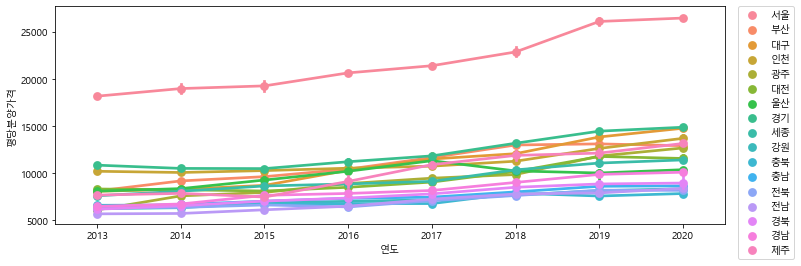

In [49]:
#비교하기 위해 위에서 했던 분양가격 그래프를 가져온다
plt.figure(figsize=(12,4))
sns.pointplot(data=df_plus, x="연도", y="평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

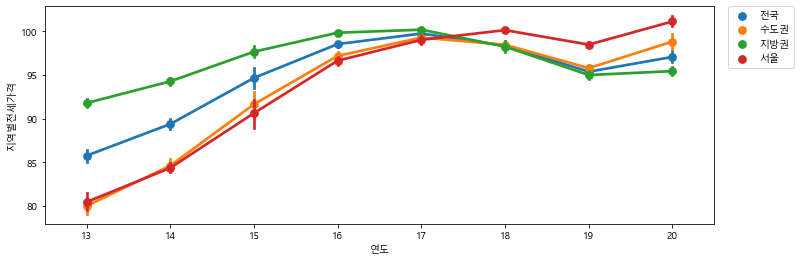

In [50]:
#전국 전세가격 그래프
plt.figure(figsize=(12,4))
sns.pointplot(data=df_charter_prepare, x="연도", y="지역별전세가격", hue = "지역")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

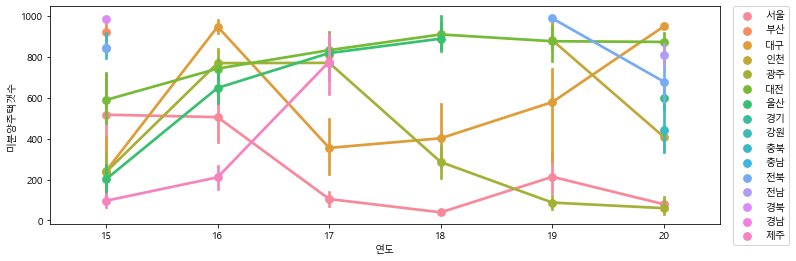

In [71]:
#전국 미분양주택갯수 그래프
plt.figure(figsize=(12,4))
sns.pointplot(data=df_unsold_prepare, x="연도", y="미분양주택갯수", hue = "지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

## 서울 분양가격과 전세가격, 미분양주택갯수와 비교

(76, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

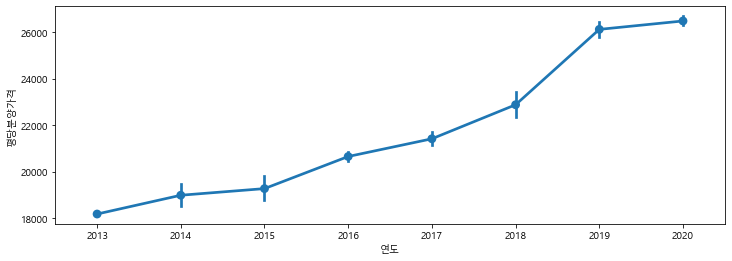

In [53]:
# 서울 분양가격 그래프
df_seoul = df_plus[df_plus["지역명"] == "서울"]
print(df_seoul.shape)
plt.figure(figsize=(12,4))
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

(85, 4)


<AxesSubplot:xlabel='연도', ylabel='지역별전세가격'>

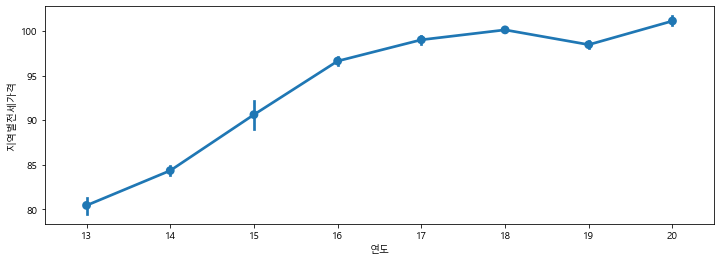

In [54]:
# 서울 전세가격 그래프
df_seoul2 = df_charter_prepare[df_charter_prepare["지역"] == "서울"]
print(df_seoul2.shape)
plt.figure(figsize=(12,4))
sns.pointplot(data=df_seoul2, x="연도", y="지역별전세가격")

(69, 4)


<AxesSubplot:xlabel='연도', ylabel='미분양주택갯수'>

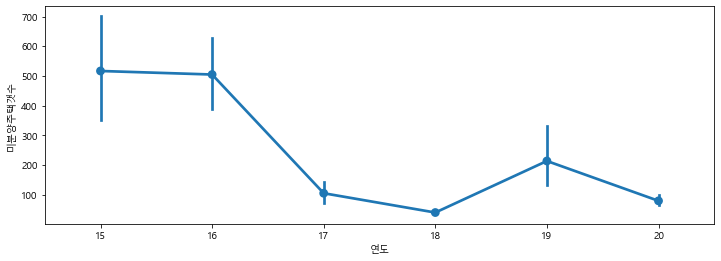

In [79]:
# 서울 미분양주택 그래프
df_seoul3 = df_unsold_prepare[df_unsold_prepare["지역명"] == "서울"]
print(df_seoul3.shape)
plt.figure(figsize=(12,4))
sns.pointplot(data=df_seoul3, x="연도", y="미분양주택갯수")